# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for regression
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202208

In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [3]:
torch.randn??

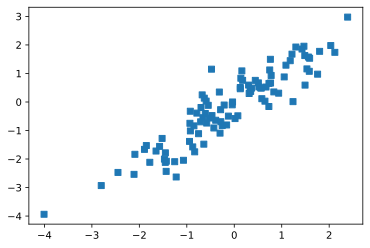

In [4]:
# create data

N = 100
x = torch.randn(N,1) # output (100,1) tensors
# print(f"x:{x}")

y = x + torch.randn(N,1)/2
# print(f"y:{y}")

# and plot
plt.plot(x,y,'s')
plt.show()

In [5]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [6]:
# learning rate
learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimizer (the flavor of gradient descent to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

In [7]:
# train the model
numepochs = 500
losses = torch.zeros(numepochs)


## Train the model!
for epochi in range(numepochs):

  # forward pass
  yHat = ANNreg(x)

  # compute loss
  loss = lossfun(yHat,y)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

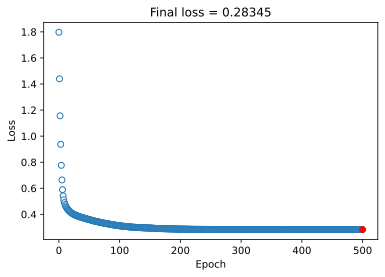

In [10]:
# show the losses

# manually compute losses
# final forward pass
predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [11]:
losses

tensor([1.7969, 1.4397, 1.1558, 0.9369, 0.7761, 0.6640, 0.5896, 0.5417, 0.5108,
        0.4903, 0.4758, 0.4647, 0.4558, 0.4482, 0.4415, 0.4356, 0.4303, 0.4254,
        0.4211, 0.4171, 0.4134, 0.4101, 0.4070, 0.4041, 0.4015, 0.3990, 0.3967,
        0.3946, 0.3925, 0.3906, 0.3886, 0.3868, 0.3850, 0.3833, 0.3817, 0.3801,
        0.3786, 0.3772, 0.3758, 0.3744, 0.3731, 0.3719, 0.3704, 0.3690, 0.3676,
        0.3662, 0.3648, 0.3635, 0.3622, 0.3610, 0.3597, 0.3585, 0.3574, 0.3558,
        0.3543, 0.3529, 0.3516, 0.3504, 0.3492, 0.3480, 0.3469, 0.3459, 0.3448,
        0.3438, 0.3428, 0.3418, 0.3408, 0.3397, 0.3386, 0.3375, 0.3365, 0.3355,
        0.3345, 0.3336, 0.3327, 0.3318, 0.3309, 0.3301, 0.3292, 0.3284, 0.3276,
        0.3268, 0.3258, 0.3249, 0.3240, 0.3231, 0.3222, 0.3214, 0.3206, 0.3198,
        0.3190, 0.3183, 0.3176, 0.3169, 0.3162, 0.3155, 0.3148, 0.3142, 0.3136,
        0.3129, 0.3123, 0.3116, 0.3110, 0.3104, 0.3098, 0.3092, 0.3087, 0.3082,
        0.3077, 0.3072, 0.3067, 0.3062, 

In [16]:
losses.detach()

tensor([1.7969, 1.4397, 1.1558, 0.9369, 0.7761, 0.6640, 0.5896, 0.5417, 0.5108,
        0.4903, 0.4758, 0.4647, 0.4558, 0.4482, 0.4415, 0.4356, 0.4303, 0.4254,
        0.4211, 0.4171, 0.4134, 0.4101, 0.4070, 0.4041, 0.4015, 0.3990, 0.3967,
        0.3946, 0.3925, 0.3906, 0.3886, 0.3868, 0.3850, 0.3833, 0.3817, 0.3801,
        0.3786, 0.3772, 0.3758, 0.3744, 0.3731, 0.3719, 0.3704, 0.3690, 0.3676,
        0.3662, 0.3648, 0.3635, 0.3622, 0.3610, 0.3597, 0.3585, 0.3574, 0.3558,
        0.3543, 0.3529, 0.3516, 0.3504, 0.3492, 0.3480, 0.3469, 0.3459, 0.3448,
        0.3438, 0.3428, 0.3418, 0.3408, 0.3397, 0.3386, 0.3375, 0.3365, 0.3355,
        0.3345, 0.3336, 0.3327, 0.3318, 0.3309, 0.3301, 0.3292, 0.3284, 0.3276,
        0.3268, 0.3258, 0.3249, 0.3240, 0.3231, 0.3222, 0.3214, 0.3206, 0.3198,
        0.3190, 0.3183, 0.3176, 0.3169, 0.3162, 0.3155, 0.3148, 0.3142, 0.3136,
        0.3129, 0.3123, 0.3116, 0.3110, 0.3104, 0.3098, 0.3092, 0.3087, 0.3082,
        0.3077, 0.3072, 0.3067, 0.3062, 

In [12]:
testloss

tensor(0.2834, grad_fn=<MeanBackward0>)

In [13]:
testloss.detach()

tensor(0.2834)

In [14]:
testloss.item()

0.28344976902008057

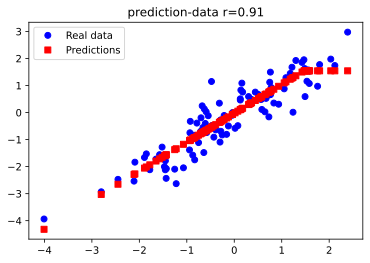

In [15]:
# plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

# Additional explorations

In [33]:
# 1) How much data is "enough"? Try different values of N and see how low the loss gets. 
#    Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?
# 
# 2) Does your conclusion above depend on the amount of noise in the data? Try changing the noise level
#    by changing the division ("/2") when creating y as x+randn.
# 
# 3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
#    into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
#    Then count the number of times the model had a loss>.25.

In [17]:
import pandas as pd
from tqdm.notebook import tqdm

In [38]:
def train(model_num=100, numepochs=500):
    model_losses = {}
    for num in tqdm(range(model_num)):

        ANNreg = nn.Sequential(
        nn.Linear(1,1),  # input layer
        nn.ReLU(),       # activation function
        nn.Linear(1,1)   # output layer
        )
        learningRate = .05
        lossfun = nn.MSELoss()
        optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)
        
        losses = torch.zeros(numepochs)
        for epochi in range(numepochs):
            # forward pass
            yHat = ANNreg(x)

            # compute loss
            loss = lossfun(yHat,y)
            losses[epochi] = loss

            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        # test
        predictions = ANNreg(x)
        testloss = (predictions-y).pow(2).mean()
        model_losses[num] = testloss.item()

        # print(f"model {num} has loss of {testloss.item()}")
    return model_losses

In [39]:
losses = train()
losses

  0%|          | 0/100 [00:00<?, ?it/s]

{0: 1.0929070711135864,
 1: 0.24392643570899963,
 2: 0.24432320892810822,
 3: 0.2435634285211563,
 4: 0.2570928633213043,
 5: 0.24382774531841278,
 6: 1.0929070711135864,
 7: 1.0929070711135864,
 8: 1.0929070711135864,
 9: 1.0929070711135864,
 10: 0.24428321421146393,
 11: 0.2563890218734741,
 12: 0.24424009025096893,
 13: 0.24466970562934875,
 14: 0.2548590302467346,
 15: 0.25935015082359314,
 16: 0.2559196650981903,
 17: 0.24375253915786743,
 18: 1.0929070711135864,
 19: 0.24383968114852905,
 20: 0.24361249804496765,
 21: 0.24362504482269287,
 22: 0.2556874752044678,
 23: 1.0929070711135864,
 24: 1.0929070711135864,
 25: 0.2442905306816101,
 26: 0.2568328082561493,
 27: 0.26373621821403503,
 28: 0.25592419505119324,
 29: 1.0929070711135864,
 30: 0.2565072774887085,
 31: 1.0929070711135864,
 32: 0.24401287734508514,
 33: 0.25671225786209106,
 34: 0.25583747029304504,
 35: 1.0929070711135864,
 36: 0.2440861165523529,
 37: 0.25516608357429504,
 38: 0.24354438483715057,
 39: 0.2556350827

In [49]:
result = pd.DataFrame(losses.values(),index=losses.keys(),columns=['MSE'])

In [51]:
result.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSE,100.0,0.478049,0.375862,0.243038,0.244061,0.256013,1.092907,1.092907
